# Data Wrangling

As the data to build the model is from 3rd party resource, exploration and cleaning is essential step. 
Meanwhile, the primary data is question sentance which a typical NLP data cleaning step should be followed to guarantee the data is generic.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

### Preliminary EDA

In [3]:
print('Training data set: ' + str(len(train_data)))
print('Test data set: ' + str(len(test_data)))


Training data set: 1306122
Test data set: 375806


The below indicate there is no null cell in all columns. Hence, don't need to fill or remove the record at this moment 

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
qid              1306122 non-null object
question_text    1306122 non-null object
target           1306122 non-null int64
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375806 entries, 0 to 375805
Data columns (total 2 columns):
qid              375806 non-null object
question_text    375806 non-null object
dtypes: object(2)
memory usage: 5.7+ MB


In [6]:
print (train_data.question_text.describe())
print('\n')
print (test_data.question_text.describe())

count                1306122
unique               1306122
top       What is boof weed?
freq                       1
Name: question_text, dtype: object


count                                                375806
unique                                               375806
top       Is Jennifer Aniston really a stuck-up bitch? I...
freq                                                      1
Name: question_text, dtype: object


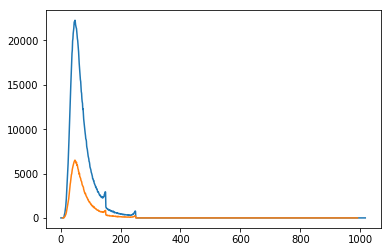

In [7]:
train_data['length'] = train_data['question_text'].str.len()
test_data['length'] = test_data['question_text'].str.len()

train_data['length'].value_counts().sort_index().plot(kind='line')
test_data['length'].value_counts().sort_index().plot(kind='line')
plt.show()

Below shows the ratio on target value: majority of questions are normal/valid question

0    1225312
1      80810
Name: target, dtype: int64


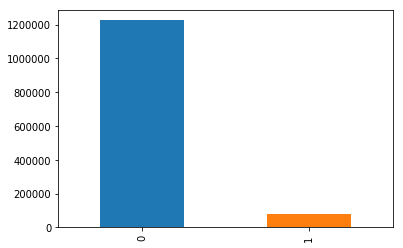

In [8]:
print(train_data['target'].value_counts())
train_data['target'].value_counts().plot(kind='bar')

Below shows the question text contains white space, special symbol & foreign characters. 
As the nlp has language specific settings and functions, the foreign characters & extra white space should be removed 
As for punchaction, some AI/ML models take the punchaction into account for semantic parsing. Some models, such as bag of words, does not using punchaction due to the natural of the algorithm is based on word frequency.    

In [9]:
sorted = train_data.sort_values('question_text')

In [10]:
sorted['question_text'].head(10)

840731          I want to blow things up with TNT now what?
613283     !TRIGGER WARNING! Am I a homophobe if I refuse...
420816                                                     "
1102919    " I post a download link of a website in my we...
213438     " I visited the theater" or "I enjoyed the the...
496717     " I've been to the doctor many times now to cu...
646127     " Is there anybody who had drastic good / bad ...
4692       " So far She has published three chapters of h...
998382     " What does the scientific mean when you dream...
387244     " if 25 men working 6 hrs a day, can do a work...
Name: question_text, dtype: object

In [11]:
sorted['question_text'].tail(10)

113435     ⁠⁠Is it bad to lay your motorcycle on its side...
146277                       −6.175 is an irrational number?
859955     ♣ Why does Winston finally give in to the ideo...
1185049    ⦁ What are the methods used to suppress or red...
415446     译文 who well be enter the next member of the st...
231111                                   한국 고등학교는 몇시간 수업하니까?
814877               what is the Complex compound sentence?
916459     ﻿What are the best porn pictures serving websi...
1261734    Ｈow do I find the negative solution of 4^x = x...
344918     ￼￼Assuming that a lightning bolt can be modell...
Name: question_text, dtype: object

### Data Wrangling for NLP 
A typical NLP pre-processed step contains the following: 
- Removing accented & foreign characters
    - The NLP is limited to one language in most of modeler, Therefore, it is helpful to remove characters tat is not english 
- Expanding Contractions
    - Frequently, contractions shows up in text taht generate variation for words. It will be helpful if we can remove them. The contractions can be removed via syntax rule.
- Expanding Abbreviation
    - Similar to tocontraction, abbreviaton generates word variation which incrase number of features int the training data. However, due to the large amount of abbreviation , possible ambiguity and has no aviable API, this will be skipped   
- Case Unification
    - This is to make all character to lower case such that the string comparsion cn recognize them
- Removing Special Characters
    - To remove non alphanumeric characters 
- Stemming
    - To remove word affixes to get to the base form of a word
- Lemmatization 
    - Also to remove word affixes to get to the base form of a word  [refrence on the difference between Stemming and Lemmatization](https://www.datacamp.com/community/tutorials/stemming-lemmatization-python)
- Removing Stopwords
    - To remove english stop words


In [12]:
#control parameter for data wrangling steps
remove_accent = True
remove_non_ascii = True
remove_white_space = True
expand_contraction = True
case_unification = True
remove_special_character = True
stemming = False
lemmatization = True
remove_stopword = False

### Removing accented & foreign characters

In [13]:
%%time

def remove_non_ascii(text):
    return ''.join(i for i in text if ord(i)<128)
def remove_white_space(text):
    return text.strip().strip('\t\n')

if remove_accent:
    train_data['question_text'] = train_data['question_text'].str.normalize('NFKD')
    test_data['question_text'] = test_data['question_text'].str.normalize('NFKD')

if remove_non_ascii:
    train_data['question_text'] = train_data['question_text'].apply(remove_non_ascii)
    test_data['question_text'] = test_data['question_text'].apply(remove_non_ascii)

if remove_white_space:
    train_data['question_text'] = train_data['question_text'].apply(remove_white_space)
    test_data['question_text'] = test_data['question_text'].apply(remove_white_space)


CPU times: user 17.2 s, sys: 113 ms, total: 17.3 s
Wall time: 17.3 s


### Expanding Contractions  : use [contractions](https://github.com/kootenpv/contractions), an altervative is [pycontractions](https://pypi.org/project/pycontractions/)

In [14]:
%%time

import contractions

if expand_contraction:
    train_data['question_text'] = train_data['question_text'].apply(contractions.fix)
    test_data['question_text'] = test_data['question_text'].apply(contractions.fix)


CPU times: user 2min 38s, sys: 282 ms, total: 2min 38s
Wall time: 2min 38s


### Case Unification

In [15]:
%%time

if case_unification:
    train_data['question_text'] = train_data['question_text'].str.lower()
    test_data['question_text'] = test_data['question_text'].str.lower()


CPU times: user 1.01 s, sys: 47.2 ms, total: 1.06 s
Wall time: 1.06 s


### Removing Special Characters

In [16]:
%%time

import re

def remove_special_character(text):
    return re.sub('[^A-Za-z0-9\s]+', '', text)

if remove_special_character:
    train_data['question_text'] = train_data['question_text'].apply(remove_special_character)
    test_data['question_text'] = test_data['question_text'].apply(remove_special_character)


CPU times: user 5.67 s, sys: 27 ms, total: 5.69 s
Wall time: 5.7 s


### Stemming

In [17]:
%%time

import nltk
#nltk.download('punkt')
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 

def porter_stemmer(text): #PorterStemmer
    ps = PorterStemmer()
    text = ' '.join([ps.stem(word) for word in word_tokenize(text)])
    return text

if stemming:
    train_data['question_text'] = train_data['question_text'].apply(porter_stemmer)
    test_data['question_text'] = test_data['question_text'].apply(porter_stemmer)


CPU times: user 583 ms, sys: 147 ms, total: 730 ms
Wall time: 728 ms


### Lemmatization

In [18]:
%%time

import nltk
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')
#nltk.download()
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
from nltk.corpus import  wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def lemmatizer(text): 
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(text)])
    return text

if lemmatization:
    train_data['question_text'] = train_data['question_text'].apply(lemmatizer)
    test_data['question_text'] = test_data['question_text'].apply(lemmatizer)
    


CPU times: user 44min 27s, sys: 3min 55s, total: 48min 23s
Wall time: 48min 27s


### Removing Stopwords

In [ ]:
%%time

import nltk
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))

stop_words.remove('not')
stop_words.remove('no')

def remove_stop_word(text): 
    text = ' '.join([w for w in nltk.word_tokenize(text) if w not in stop_words])
    return text

if remove_stopword:
    train_data['question_text'] = train_data['question_text'].apply(remove_stop_word)
    test_data['question_text'] = test_data['question_text'].apply(remove_stop_word)


CPU times: user 2.08 ms, sys: 5.85 ms, total: 7.93 ms
Wall time: 10.6 ms


### Post EDA 

count    1.306122e+06
mean     6.669623e+01
std      3.674149e+01
min      0.000000e+00
25%      4.200000e+01
50%      5.700000e+01
75%      8.100000e+01
max      6.840000e+02
Name: length_a, dtype: float64
count    375806.000000
mean         66.768788
std          36.715593
min           4.000000
25%          42.000000
50%          57.000000
75%          81.000000
max         486.000000
Name: length_a, dtype: float64


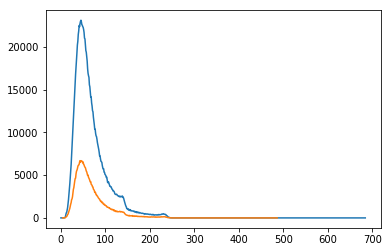

In [ ]:
train_data['length_a'] = train_data['question_text'].str.len()
test_data['length_a'] = test_data['question_text'].str.len()

train_data['length_a'].value_counts().sort_index().plot(kind='line')
test_data['length_a'].value_counts().sort_index().plot(kind='line')

print(train_data['length_a'].describe())
print(test_data['length_a'].describe())

count    1.306122e+06
mean     1.287693e+01
std      7.140912e+00
min      0.000000e+00
25%      8.000000e+00
50%      1.100000e+01
75%      1.500000e+01
max      1.350000e+02
Name: word_count, dtype: float64
count    375806.000000
mean         12.885060
std           7.133849
min           1.000000
25%           8.000000
50%          11.000000
75%          15.000000
max          83.000000
Name: word_count, dtype: float64


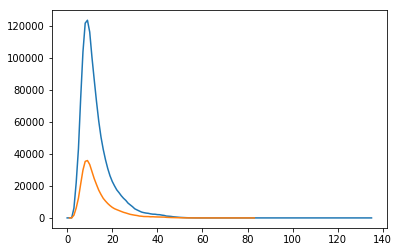

In [ ]:
#train_data['word_count'] = train_data['question_text'].apply(lambda x: len(nltk.word_tokenize(x)))   tooo slow
train_data['word_count'] = train_data['question_text'].apply(lambda x: len(str(x).split()))
test_data['word_count'] = test_data['question_text'].apply(lambda x: len(str(x).split()))

train_data['word_count'].value_counts().sort_index().plot(kind='line')
test_data['word_count'].value_counts().sort_index().plot(kind='line')
print(train_data['word_count'].describe())
print(test_data['word_count'].describe())

9    123677
8    121863
7    103842
6     75104
5     43214
4     21982
3      6085
2        60
1        23
0         6
Name: word_count, dtype: int64
9    35901
8    35373
7    29890
6    21266
5    12343
4     6184
3     1723
2       16
1        3
Name: word_count, dtype: int64


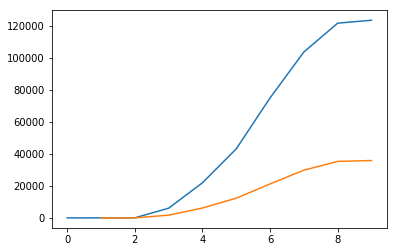

In [ ]:
train_data.loc[(train_data.word_count < 10),'word_count'].value_counts().sort_index().plot(kind='line')
test_data.loc[(test_data.word_count < 10),'word_count'].value_counts().sort_index().plot(kind='line')
print(train_data.loc[(train_data.word_count < 10),'word_count'].value_counts())
print(test_data.loc[(test_data.word_count < 10),'word_count'].value_counts())

In [ ]:
%%time

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

train_text = train_data['question_text']
test_text = test_data['question_text']
train_target = train_data['target']
all_text = train_text.append(test_text)

count_vectorizer = CountVectorizer()
count_vectorizer.fit(all_text)


bag_of_words = count_vectorizer.transform(all_text)
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
word_check = pd.DataFrame(words_freq, columns=['word', 'count'])
sorted_word_check= word_check.sort_values('count', ascending=False)
print(sorted_word_check.head(30))
print(sorted_word_check.tail(30))

       word    count
45       be  1222159
9       the   858403
106    what   607464
1        do   546544
19       to   525636
8        in   485183
151      of   429194
0       how   372798
20      and   330583
53      for   263477
11      you   261903
35      can   241888
23      why   210635
66       it   203191
12     have   199833
71       my   145285
82     that   138999
21      not   134905
68       if   127179
174    with   123644
445      on   121579
51       or   120233
97      get   102421
365    from    89682
100    your    87077
13       an    86525
196  should    84671
227   which    84593
16    would    81846
60     when    81068
                           word  count
151413               parabellum      1
52885                     33045      1
151414                qalandars      1
151415                 terrigal      1
151416            anklebracelet      1
151417                     cony      1
151418                 supercup      1
52882                     hedon      

 ### Another baseline after data wrangling to compare with the initial baseline

In [ ]:
import datetime, time, psutil, os
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# remove records have no word after data wrangling
train_data = train_data.loc[(train_data.word_count > 0)]
test_data = test_data.loc[(test_data.word_count > 0)]
train_data= train_data.reset_index()
test_data = test_data.reset_index()

In [ ]:
#  CONTROL PARAMTERS 
size = 0.1
tfTransform = True

train_data = train_data[: int(len(train_data) * size)]
test_data = test_data[:int(len(test_data) * size)]

In [ ]:
train_text = train_data['question_text']
test_text = test_data['question_text']
train_target = train_data['target']
all_text = train_text.append(test_text)

In [ ]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit(all_text)
train_text_features_cv = count_vectorizer.transform(train_text)
test_text_features_cv = count_vectorizer.transform(test_text)

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(all_text)
train_text_features_tf = tfidf_vectorizer.transform(train_text)
test_text_features_tf = tfidf_vectorizer.transform(test_text)

In [ ]:
if tfTransform :
    train_text_features = train_text_features_tf
    test_text_features = test_text_features_tf
else:
    train_text_features = train_text_features_cv
    test_text_features = test_text_features_cv

print(train_text_features.shape)

(130611, 64907)


In [ ]:
%%time

#BernoulliNB
kfold = KFold(n_splits = 5, shuffle = True, random_state = 1)
test_preds = 0
oof_preds = np.zeros([train_data.shape[0],])

for i, (train_idx,valid_idx) in enumerate(kfold.split(train_data)):
    x_train, x_valid = train_text_features[train_idx,:], train_text_features[valid_idx,:]
    y_train, y_valid = train_target[train_idx], train_target[valid_idx]
    classifier = BernoulliNB()
    classifier.fit(x_train,y_train)
   
    oof_preds[valid_idx] = classifier.predict_proba(x_valid)[:,1]
    test_preds += 0.2*classifier.predict_proba(test_text_features)[:,1]

pred_train = (oof_preds > 0.25).astype(np.int)
accuracy = f1_score(train_target, pred_train)
print(accuracy)

0.4096609382257315
CPU times: user 1.38 s, sys: 57 ms, total: 1.43 s
Wall time: 405 ms


In [ ]:
%%time

#LogisticRegression

kfold = KFold(n_splits = 5, shuffle = True, random_state = 1)
test_preds = 0
oof_preds = np.zeros([train_data.shape[0],])

for i, (train_idx,valid_idx) in enumerate(kfold.split(train_data)):
    x_train, x_valid = train_text_features[train_idx,:], train_text_features[valid_idx,:]
    y_train, y_valid = train_target[train_idx], train_target[valid_idx]
    classifier = LogisticRegression(solver='liblinear')
    classifier.fit(x_train,y_train)
   
    oof_preds[valid_idx] = classifier.predict_proba(x_valid)[:,1]
    test_preds += 0.2*classifier.predict_proba(test_text_features)[:,1]

pred_train = (oof_preds > 0.25).astype(np.int)
accuracy = f1_score(train_target, pred_train)
print(accuracy)

0.5603069496874806
CPU times: user 10.7 s, sys: 120 ms, total: 10.8 s
Wall time: 2.71 s


In [ ]:
%%time

#GradientBoostingClassifier

kfold = KFold(n_splits = 5, shuffle = True, random_state = 1)
test_preds = 0
oof_preds = np.zeros([train_data.shape[0],])

for i, (train_idx,valid_idx) in enumerate(kfold.split(train_data)):
    x_train, x_valid = train_text_features[train_idx,:], train_text_features[valid_idx,:]
    y_train, y_valid = train_target[train_idx], train_target[valid_idx]
    classifier = GradientBoostingClassifier(random_state=1)
    classifier.fit(x_train,y_train)
   
    oof_preds[valid_idx] = classifier.predict_proba(x_valid)[:,1]
    test_preds += 0.2*classifier.predict_proba(test_text_features)[:,1]

pred_train = (oof_preds > 0.25).astype(np.int)
accuracy = f1_score(train_target, pred_train)
print(accuracy)

### Apply Both CountVector and TfIdfVector,  Accuracy Reporting Using Confusion Matrix

In [ ]:
from sklearn.model_selection import train_test_split
train_text = train_data['question_text']
test_text = test_data['question_text']
train_target = train_data['target']
all_text = train_text.append(test_text)
X_train, X_test, y_train, y_test = train_test_split(train_text, train_target, test_size=0.20, random_state = 0)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# apply both cont vector & tf-idf vector 
count_vectorizer = CountVectorizer()
tfidf_transformer = TfidfTransformer()

# from X_train -> X_train_counts -> X_train_tfidf
X_train_count = count_vectorizer.fit_transform(X_train)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_count)

# fit model
#classifier = BernoulliNB().fit(X_train_tfidf, y_train)
classifier = LogisticRegression(solver='liblinear').fit(X_train_tfidf,y_train)
#classifier = GradientBoostingClassifier(random_state=1).fit(X_train_tfidf,y_train)

X_test_count = count_vectorizer.transform(X_test)
x_test_tfidf = tfidf_transformer.transform(X_test_count)
y_pred = classifier.predict(x_test_tfidf)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print(conf_mat)  
print('\n\n')
print(classification_report(y_test,y_pred))  
print('\n\n')
print(accuracy_score(y_test, y_pred))  
print('\n\n')
print (np.mean(y_pred == y_test))
print('\n\n')

### Data Pipeline  [ref 1](https://www.kaggle.com/dilip990/spam-ham-detection-using-naive-bayes-classifier) [ref2](https://gist.github.com/amberjrivera/8c5c145516f5a2e894681e16a8095b5c) [ref 3](http://carrefax.com/articles-blog/2018/3/11/using-scikit-learn-to-classify-your-own-text-data-the-short-version)

In [ ]:
from nltk.corpus import stopwords
import string

def text_process(text):
    nopunc =[char for char in text if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

train_text = train_data['question_text']
test_text = test_data['question_text']
train_target = train_data['target']
all_text = train_text.append(test_text)

from sklearn.pipeline import Pipeline
pipeline = Pipeline([
   ( 'bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression()),
])

X_train, X_test, y_train, y_test = train_test_split(train_text, train_target, test_size=0.25, random_state = 0)

#for data check
bow_transformer = CountVectorizer(analyzer=text_process).fit(train_text)
print(len(bow_transformer.vocabulary_))

In [ ]:
pipeline.fit(X_train,y_train)

In [ ]:
predictions = pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_train = confusion_matrix(y_test,predictions)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_train, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(conf_train)
print('\n\n')
print(classification_report(y_test,predictions))
print('\n\n')
print(accuracy_score(y_test, predictions))  
print('\n\n')
print (np.mean(predictions == y_test))
print('\n\n')


In [ ]:
# for data check 
pipeline.fit(train_text,train_target)
all_predictions =  pipeline.predict(train_text)
conf_all = confusion_matrix(train_target,all_predictions)
print(conf_all)
print('\n\n')

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_all, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:
print (np.mean(all_predictions == train_target))